## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Reading the data file

In [4]:
df = pd.read_csv('day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Creating two new columns 'Year' and 'Month' after extracting the months and years from 'dteday' column

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['Year'] = pd.DatetimeIndex(df['dteday']).year
df['Month'] = pd.DatetimeIndex(df['dteday']).month

### Dropping the 'dteday' column

In [9]:
df.drop(['dteday'], axis = 1, inplace = True)

### Dropping the 'instant', 'casual' and 'registered' columns as they do not seem significant for the model building. 'cnt' column is sufficient in place of both 'casual' and 'registered' columns.

In [10]:
df = df.drop(['instant','casual','registered'],axis=1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Year,Month
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,2
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,3
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,4
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,5


In [12]:
df.shape

(730, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Year        730 non-null    int64  
 13  Month       730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [14]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Year,Month
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,2018.500000,6.526027
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,0.500343,3.450215
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,2018.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,2018.000000,4.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,2018.500000,7.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,2019.000000,10.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,2019.000000,12.000000


## Data Visualisation

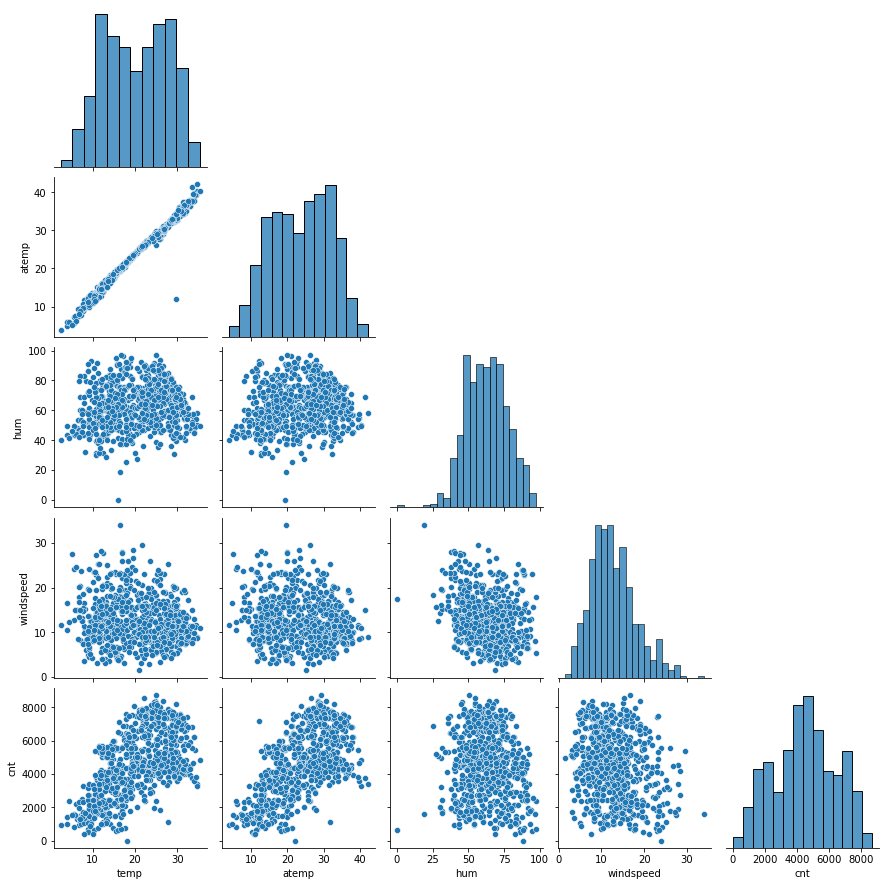

In [15]:
sns.pairplot(data = df, x_vars=['temp','atemp','hum','windspeed','cnt'],
                        y_vars=['temp','atemp','hum','windspeed','cnt'], corner=True)
plt.show()

### From the pairplots, it is visible that the target variable 'cnt' is linear with 'temp' and 'atemp' indpendent variables. So, we can proceed to make the linear regression model.

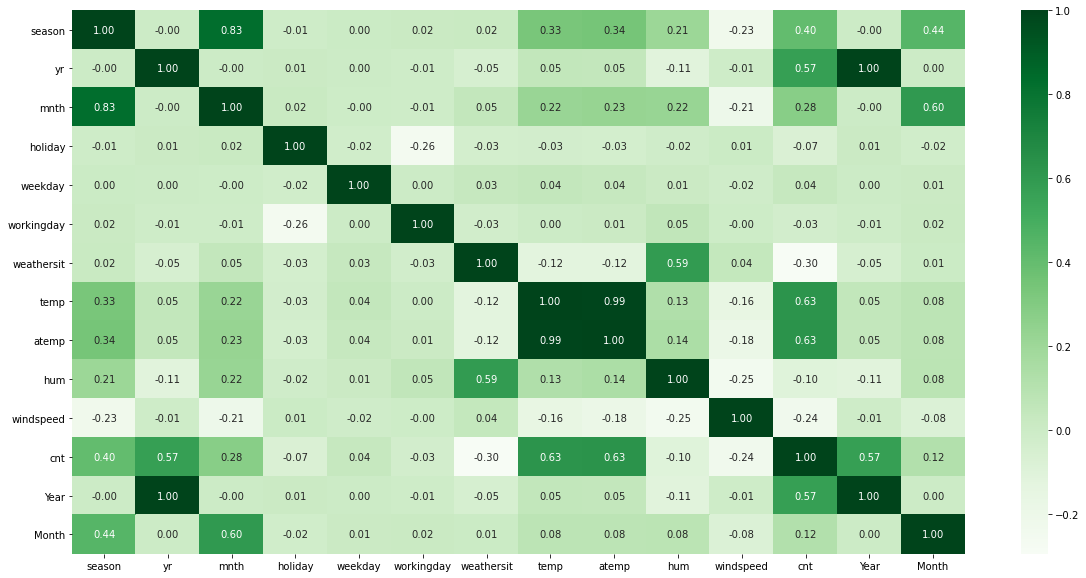

In [16]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.show()

### It is quite clear from the pairplot and heatmap that 'temp' and 'atemp' are correlated with each other. So, 'atemp' column is dropped for the model building process.

In [17]:
df = df.drop('atemp', axis = 1)

## Label Encoding

In [18]:
def season(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    elif x == 4:
        return 'Winter'

In [19]:
df['season'] = df['season'].apply(season)

In [20]:
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [21]:
def weathersit(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    elif x == 4:
        return 'Heavy Snow'

In [22]:
df['weathersit'] = df['weathersit'].apply(weathersit)

In [23]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [24]:
def weekday(x):
    if x == 0:
        return 'Sunday'
    elif x == 1:
        return 'Monday'
    elif x == 2:
        return 'Tuesday'
    elif x == 3:
        return 'Wednesday'
    elif x == 4:
        return 'Thursday'
    elif x == 5:
        return 'Friday'
    elif x == 6:
        return 'Saturday'

In [25]:
df['weekday'] = df['weekday'].apply(weekday)

In [26]:
df['weekday'].value_counts()

Tuesday      105
Monday       105
Friday       104
Thursday     104
Sunday       104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

In [27]:
def month(x):
    if x == 1:
        return 'January'
    elif x == 2:
        return 'February'
    elif x == 3:
        return 'March'
    elif x == 4:
        return 'April'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'June'
    elif x == 7:
        return 'July'
    elif x == 8:
        return 'August'
    elif x == 9:
        return 'September'
    elif x == 10:
        return 'October'
    elif x == 11:
        return 'November'
    elif x == 12:
        return 'December'

In [28]:
df['mnth'] = df['mnth'].apply(month)

In [29]:
df['mnth'].value_counts()

December     62
March        62
August       62
May          62
July         62
January      62
October      62
April        60
June         60
November     60
September    60
February     56
Name: mnth, dtype: int64

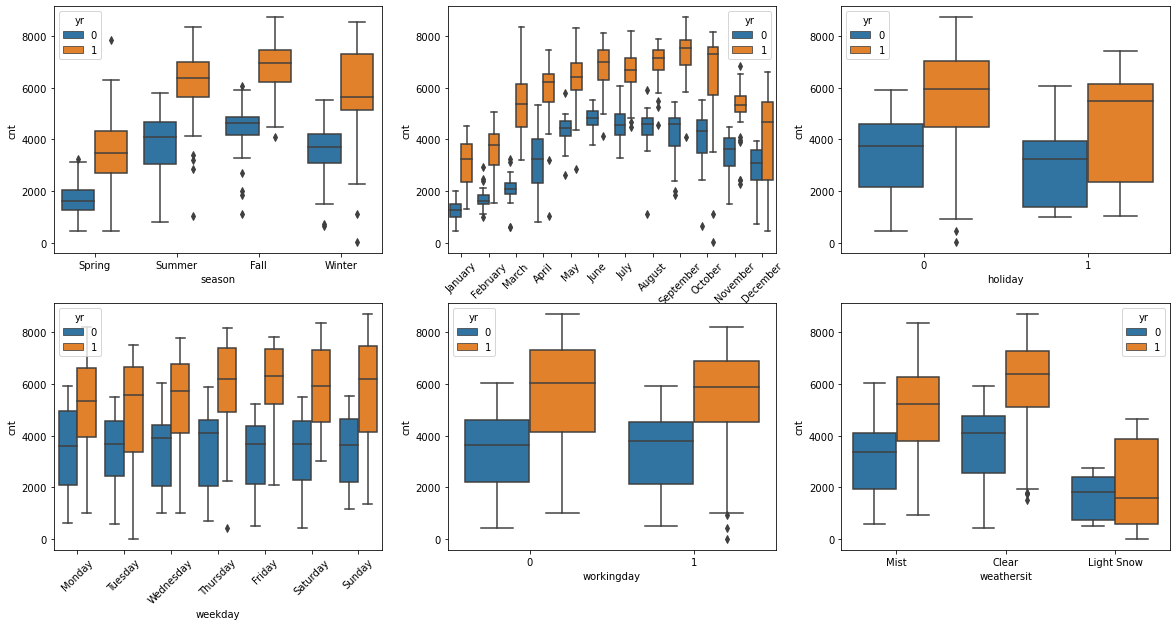

In [30]:
plt.figure(figsize=[20,10])
plt.subplot(2,3,1)
sns.boxplot(data=df, x='season', y='cnt', hue='yr')
plt.subplot(2,3,2)
sns.boxplot(data=df, x='mnth', y='cnt', hue='yr')
plt.xticks(rotation=45)
plt.subplot(2,3,3)
sns.boxplot(data=df, x='holiday', y='cnt', hue='yr')
plt.subplot(2,3,4)
sns.boxplot(data=df, x='weekday', y='cnt', hue='yr')
plt.xticks(rotation=45)
plt.subplot(2,3,5)
sns.boxplot(data=df, x='workingday', y='cnt', hue='yr')
plt.subplot(2,3,6)
sns.boxplot(data=df, x='weathersit', y='cnt', hue='yr')
plt.show()

### From the above boxplots, it is visible that the number of bike users has increased from year 2018 to 2019. In both the years, 'Fall' season has the highest number of bike users compared to other seasons. January and February have the lowest number of bike users. It hardly depends if there is holiday or not, the number of bike users is indifferent. Same is the case whether its a working day or not. It can be assumed that not only the office goers but others as well are using the bikes for day-to-day purpose. The number of bike useres is evenly distributed when it comes to the weekdays. The number of bike users is more when the weather is clear and less when its snowing lightly.

## Dummy Variables

In [31]:
season_dummies = pd.get_dummies(df['season'], drop_first = True)

In [32]:
season_dummies.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
mnth_dummies = pd.get_dummies(df['mnth'], drop_first = True)

In [34]:
mnth_dummies.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
weathersit_dummies = pd.get_dummies(df['weathersit'], drop_first = True)

In [36]:
weathersit_dummies.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [37]:
weekday_dummies = pd.get_dummies(df['weekday'], drop_first = True)

In [38]:
weekday_dummies.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### Dropping the 'season','weathersit','weekday' and 'mnth' columns.

In [39]:
df.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)

## Concating all the dataframes of dummy variables with the main dataframe

In [40]:
df = pd.concat([df, season_dummies, weekday_dummies, weathersit_dummies, mnth_dummies], axis = 1)

In [41]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Year,Month,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,August,December,February,January,July,June,March,May,November,October,September
0,0,0,1,14.110847,80.5833,10.749882,985,2018,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,2018,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,2018,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,2018,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,2018,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Year,Month,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,August,December,February,January,July,June,March,May,November,October,September
0,0,0,1,14.110847,80.5833,10.749882,985,2018,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,2018,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,2018,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,2018,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,2018,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
df.shape

(730, 31)

## Spilliting the data into train and test dataframes

In [44]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the data

In [45]:
num_vars = ['temp','hum','windspeed','cnt']

In [46]:
scaler= StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Year,Month,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,August,December,February,January,July,June,March,May,November,October,September
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,2019,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,2019,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,2019,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,-1.294913,-1.045032,2.018143,-1.379511,2019,12,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,-0.136589,2019,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model building

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', False, 12),
 ('windspeed', False, 7),
 ('Year', True, 1),
 ('Month', False, 21),
 ('Spring', True, 1),
 ('Summer', False, 6),
 ('Winter', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 18),
 ('Tuesday', False, 13),
 ('Wednesday', False, 16),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('August', False, 15),
 ('December', False, 3),
 ('February', False, 5),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 19),
 ('March', False, 20),
 ('May', False, 11),
 ('November', False, 2),
 ('October', False, 17),
 ('September', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'Year', 'Spring', 'Winter', 'Light Snow',
       'Mist', 'July', 'September'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'windspeed', 'Month', 'Summer', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'January', 'June', 'March', 'May', 'November',
       'October'],
      dtype='object')

In [52]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.16e-181
Time:                        20:37:44   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005   1.89e-05    -27.294      0.0

In [53]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'Year', 'Spring', 'Winter',
       'Light Snow', 'Mist', 'July', 'September'],
      dtype='object')

In [54]:
X_train_rfe = X_train_rfe.drop('const', axis = 1)

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Year,5.10
2,temp,2.79
4,Spring,2.54
0,yr,2.07
5,Winter,1.69
8,July,1.28
9,September,1.10
6,Light Snow,1.04
7,Mist,1.04
1,holiday,1.02


### It is clearly visible that the 'Year' variable is having very high VIF value which indicates that there is multicollinearity with this column. So, the column 'Year' is being dropped.

In [56]:
X_train_rfe = X_train_rfe.drop('Year', axis = 1)

In [57]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.16e-181
Time:                        20:37:48   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2970      0.043     -6.985      0.0

In [58]:
X_train_new = X_train_rfe.drop('const', axis = 1)

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.41
3,Spring,2.21
0,yr,1.67
4,Winter,1.55
6,Mist,1.36
7,July,1.34
8,September,1.16
5,Light Snow,1.05
1,holiday,1.04


### Since all the independent variables are having p-value less that 0.05 and VIF value less than 5, all the independent variables in the model are signigicant and not multicollinear. So, we can proceed towards residual analysis of the train data and check for the normal distribution of the error terms.

## Residual Analysis of the train data

### Predicting the data

In [60]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

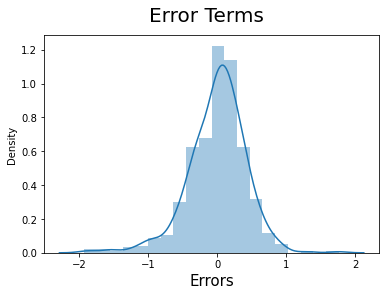

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 15)                         

### It is visible from the histogram that the error terms are normally distributed around the mean 0. So, the linear regression model is following the assumption.

### Q-Q plot

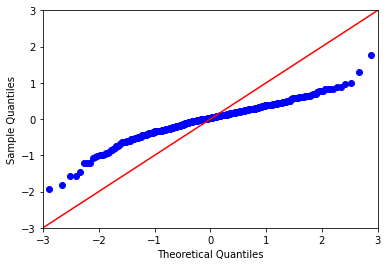

In [62]:
sm.qqplot((y_train - y_train_cnt), line='45')
plt.show()

## Residuals vs Fitted Plot

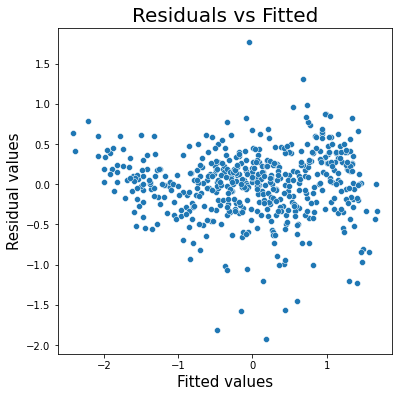

In [63]:
plt.figure(figsize=[6,6])
sns.scatterplot(y_train_cnt, (y_train - y_train_cnt))
plt.title('Residuals vs Fitted', fontsize = 20)
plt.xlabel('Fitted values', fontsize = 15)
plt.ylabel('Residual values', fontsize = 15)
plt.show()

### From the above scatter plot, it is visible that there does not exist any pattern between residuals and predicted values. So, it validates the assumption of linear regression that there is linearity in the data.

### Also, homoskedasticity is there in the error terms i.e. error terms have a constant variance.

## Making Predictions

### Scaling the test data

In [64]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

### Predicting the test values

In [67]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

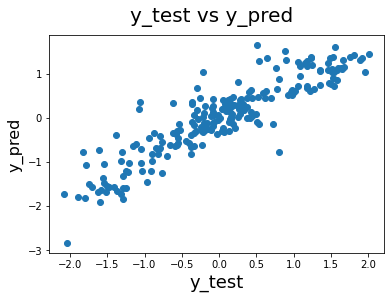

In [68]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8092200832884747

### As the R squared value of the train data is 0.823 and that of test data is 0.809, it can be concluded that the model is not overfit. Adjusted R-square is 0.819. 

### F-value is 257.5 which is high and consequently Prob(F) is low. It can be concluded that the model is significant.

### Also tried modelling the data by dropping the 'temp' variable and keeping the 'atemp' variable in the train and test dataset as 'atemp' variable indicates the feeling temperature. But the R-squared value for the train dataset dropped to 0.796 and R-squared value for test dataset dropped to 0.773. So, discarded that model in favour of the above model.

### Also tried adding 'workingday' variable to the final model but the p-value of the 'workingday' model was 0.151 which is way more than 0.05. The variable was seemingly insignificant according to the p-value, so dropped the variable from the model.

### Also tried with Normalization scaling method but in that case, the error terms were not normally distributed to the satisfaction and R-squared value and F-statistics were little low in comparison with the present R-squared value and F-statistics. Although, 'hum' variable was an important factor in the model but it also got dropped as it had high VIF value.

# Final Model

### cnt = 0.2 + (1.04 * yr) - (0.45 * holiday) + (0.47 * temp) - (0.35 * Mist) - (0.49 * Spring) + (0.24 * Winter) - (1.33 * Light Snow) - (0.3 * July) + (0.29 * September)